In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [158]:
import plotly.io as pio
# pio.templates
# default is "plotly"
pio.templates.default = "plotly_white"

In [37]:
df = pd.read_csv('csv_files//all_2020-03-27_2021-04-15.csv')
df_state_new = pd.read_csv('csv_files//state_new_2020-03-27_2021-04-15.csv')
df_state_cumu = pd.read_csv('csv_files//state_cumu_2020-03-27_2021-04-15.csv')

In [38]:
df.drop(columns='URL', inplace=True)

In [39]:
df.head()

,Date,Recovered,Cumulative Recovered,Imported Case,Local Case,Active Case,New Case,Cumulative Case,ICU,Ventilator,Death,Cumulative Death
0,27-03-20,44,259,NaN,NaN,NaN,130,2161,54,34,3,26
1,28-03-20,61,320,NaN,NaN,NaN,159,2320,73,54,1,27
2,29-03-20,68,388,NaN,NaN,NaN,150,2470,73,52,7,34
3,30-03-20,91,479,NaN,NaN,NaN,156,2626,94,62,3,37
4,31-03-20,58,537,NaN,NaN,NaN,140,2766,94,60,6,43


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  385 non-null    object 
 1   Recovered             385 non-null    int64  
 2   Cumulative Recovered  385 non-null    int64  
 3   Imported Case         86 non-null     float64
 4   Local Case            86 non-null     float64
 5   Active Case           86 non-null     float64
 6   New Case              385 non-null    int64  
 7   Cumulative Case       385 non-null    int64  
 8   ICU                   385 non-null    int64  
 9   Ventilator            385 non-null    int64  
 10  Death                 385 non-null    int64  
 11  Cumulative Death      385 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 36.2+ KB


In [41]:
df_non_na = df.dropna()
df_non_na.head()

,Date,Recovered,Cumulative Recovered,Imported Case,Local Case,Active Case,New Case,Cumulative Case,ICU,Ventilator,Death,Cumulative Death
299,20-01-21,2374,127662,5.0,4003.0,41087.0,4008,169379,246,96,11,630
300,21-01-21,2490,130152,8.0,3162.0,41755.0,3170,172549,260,103,12,642
301,22-01-21,2554,132706,6.0,3625.0,42814.0,3631,176180,251,102,18,660
302,23-01-21,4313,137019,11.0,4264.0,42769.0,4275,180455,260,103,7,667
303,24-01-21,4427,141446,7.0,3339.0,41677.0,3346,183801,265,102,11,678


In [42]:
# Check whether all active cases have the correct numbers
(df_non_na['Active Case'] == (df_non_na['Cumulative Case'] - df_non_na['Cumulative Recovered'] - df_non_na['Cumulative Death'])).all()

True

In [43]:
del df_non_na

In [44]:
def preprocess_df(df):
    # must change the date format to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')
    df['Active Case'] = (df['Cumulative Case'] - df['Cumulative Recovered'] - df['Cumulative Death'])    
    df.set_index('Date', inplace=True)
    return df

In [45]:
df = preprocess_df(df)

In [119]:
rolling_day = 7
df['SMA_new'] = df['New Case'].rolling(7, min_periods=1).mean().round(2)
df['SMA_new'].head()

Date
2020-03-27    130.00
2020-03-28    144.50
2020-03-29    146.33
2020-03-30    148.75
2020-03-31    147.00
Name: SMA_new, dtype: float64

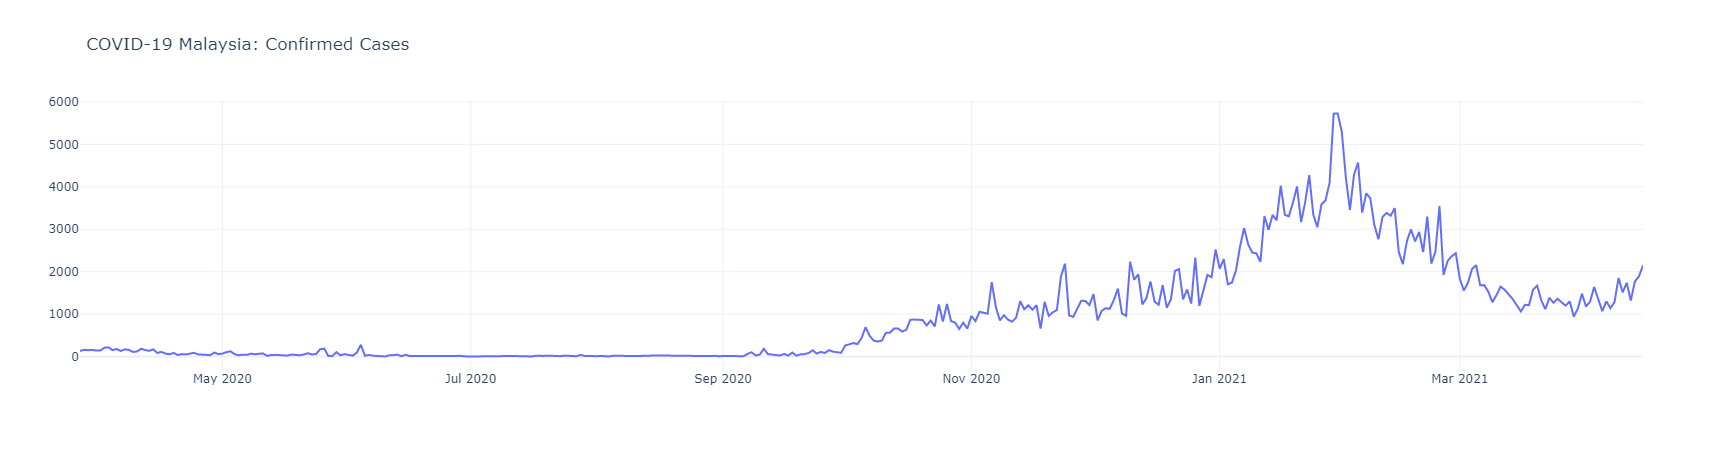

In [159]:
fig = px.line(df, x=df.index, y='New Case', title='COVID-19 Malaysia: Confirmed Cases')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

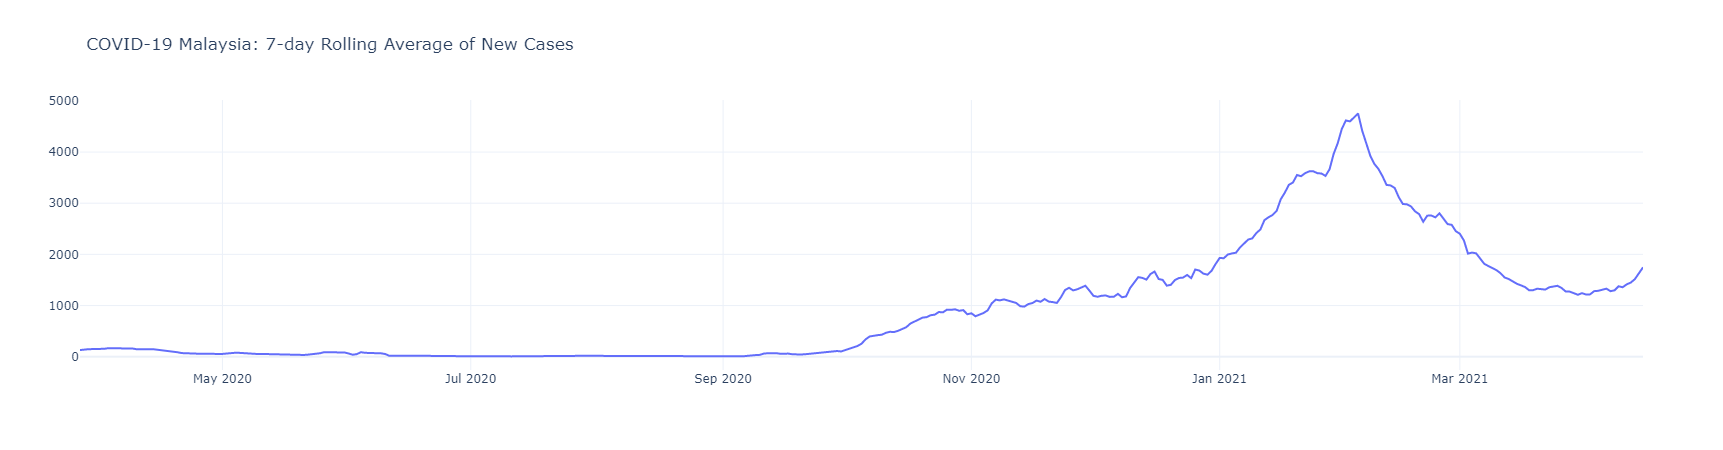

In [160]:
fig = px.line(df, x=df.index, y='SMA_new', title=f'COVID-19 Malaysia: {rolling_day}-day Rolling Average of New Cases')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

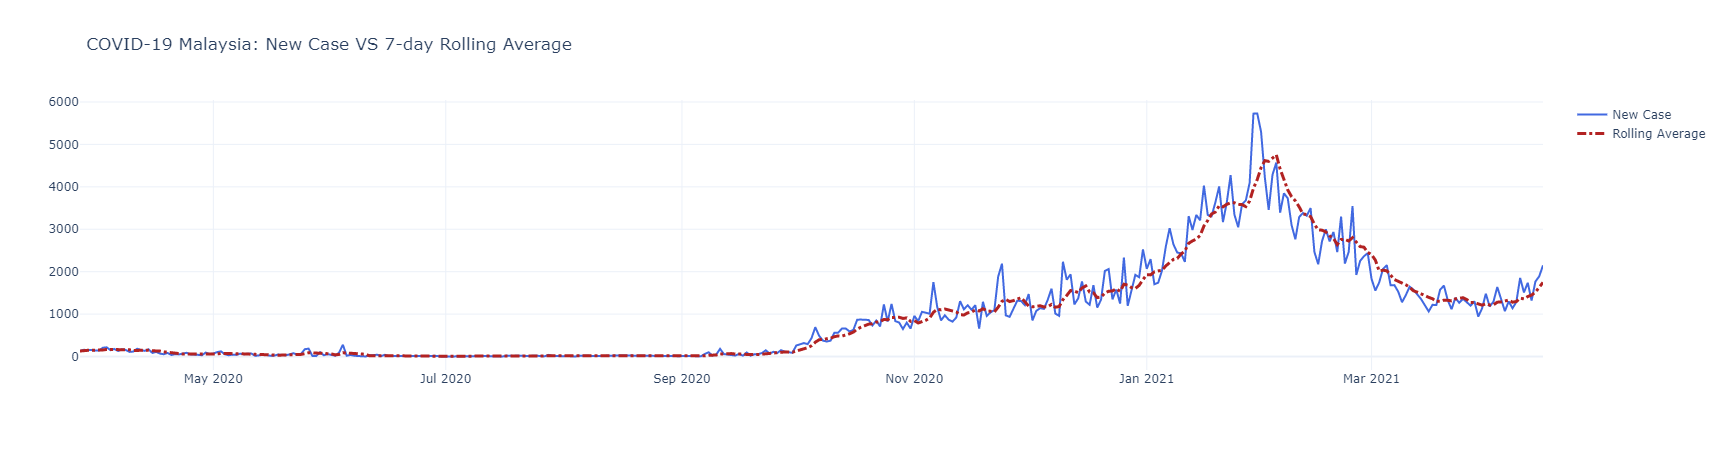

In [161]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['New Case'],
                         line=dict(color='royalblue'),
                         name='New Case'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_new'],
                         line=dict(color='firebrick', dash='dashdot', width=3),
                         name='Rolling Average'))
fig.update_layout(title='COVID-19 Malaysia: New Case VS 7-day Rolling Average')
fig.show()

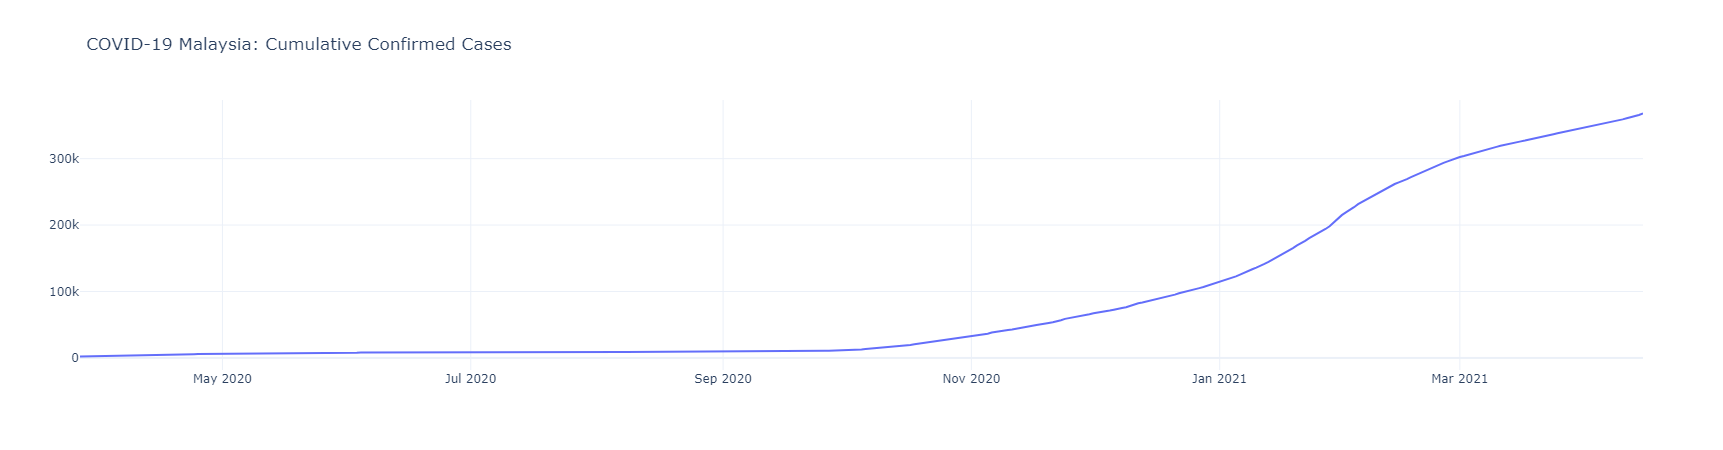

In [162]:
fig = px.line(df, x=df.index, y='Cumulative Case', title='COVID-19 Malaysia: Cumulative Confirmed Cases')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

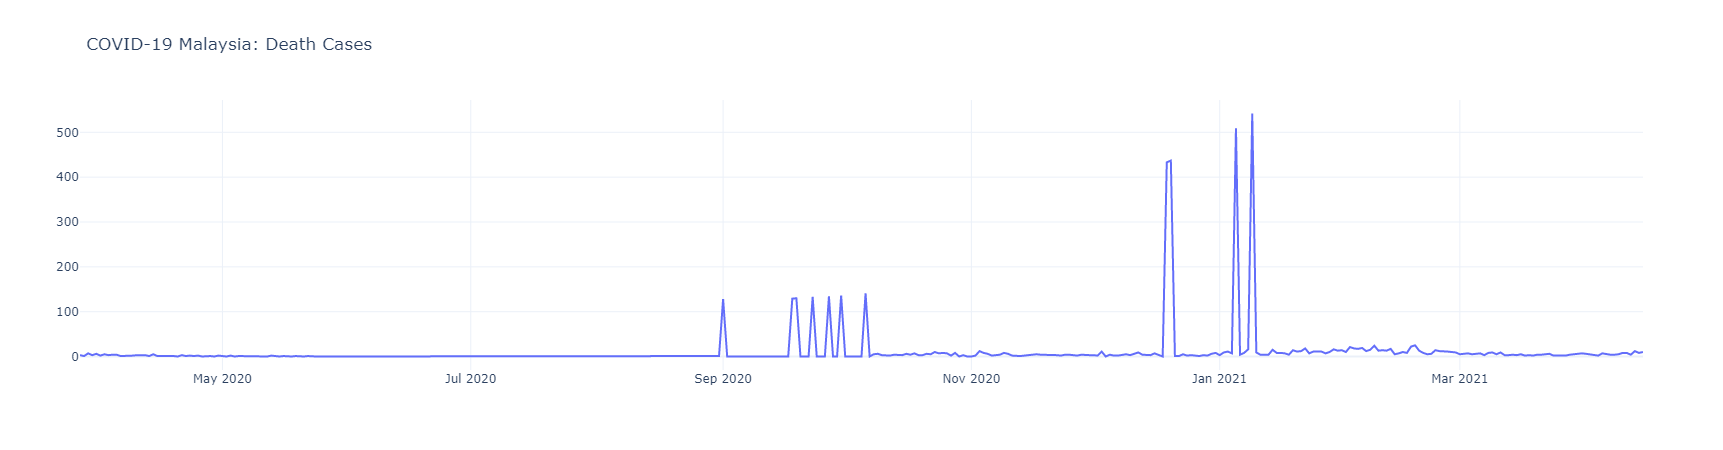

In [156]:
fig = px.line(df, x=df.index, y='Death', title='COVID-19 Malaysia: Death Cases', template='plotly_white')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

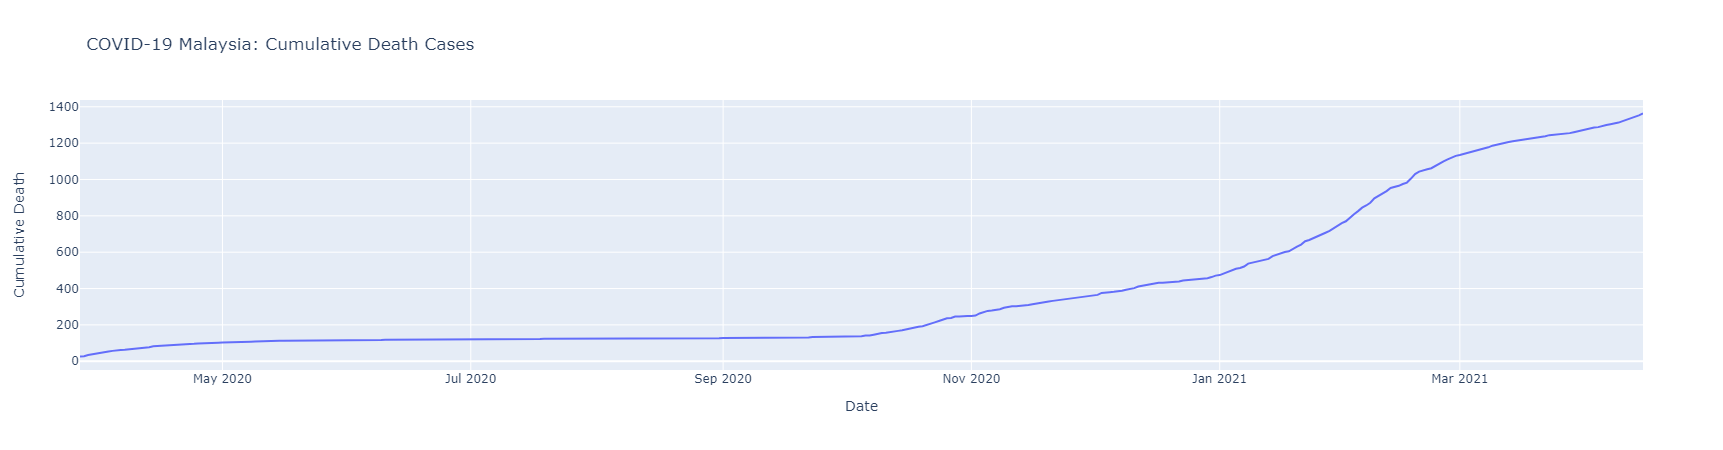

In [59]:
fig = px.line(df, x=df.index, y='Cumulative Death', title='COVID-19 Malaysia: Cumulative Death Cases')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

In [149]:
rolling_day = 7
df['EMA_0.1'] = df['New Case'].ewm(alpha=0.1).mean().round(2)
df['EMA_0.3'] = df['New Case'].ewm(alpha=0.3).mean().round(2)
df['EMA_0.1'].head()

Date
2020-03-27    130.00
2020-03-28    145.26
2020-03-29    147.01
2020-03-30    149.62
2020-03-31    147.27
Name: EMA_0.1, dtype: float64

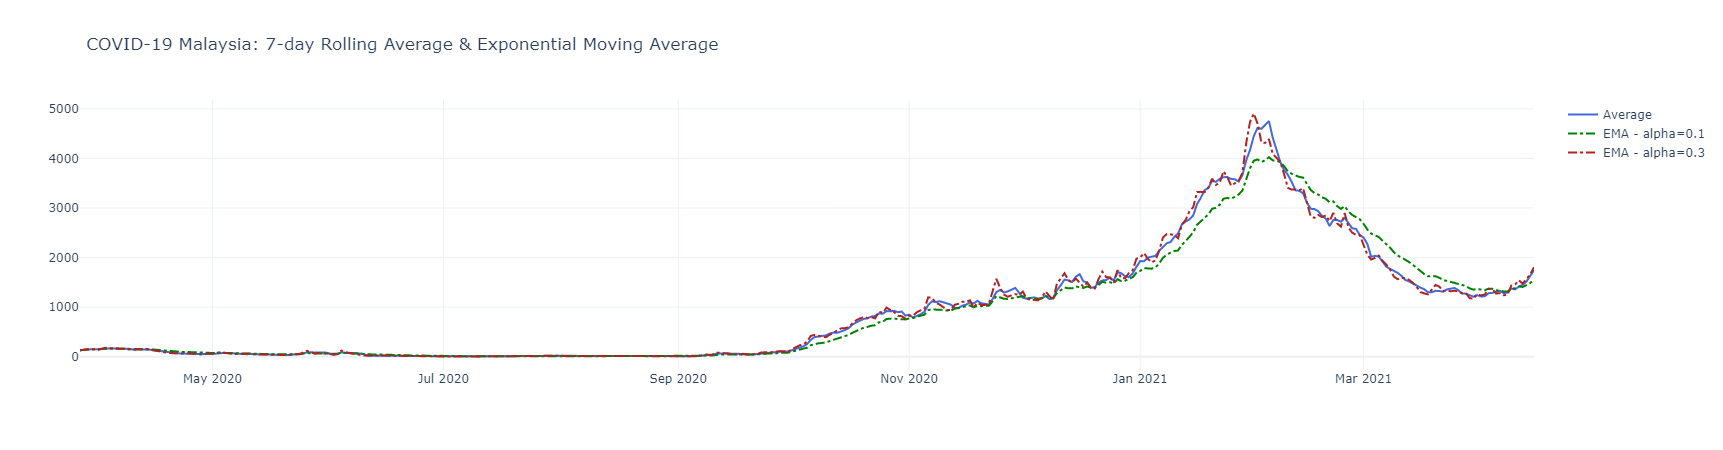

In [164]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_new'],
                         line=dict(color='royalblue'),
                         name='Average'))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_0.1'],
                         line=dict(color='green', dash='dashdot'),
                         name='EMA - alpha=0.1'))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_0.3'],
                         line=dict(color='firebrick', dash='dashdot'),
                         name='EMA - alpha=0.3'))
fig.update_layout(title='COVID-19 Malaysia: 7-day Rolling Average & Exponential Moving Average')
fig.show()